In [1]:
# This lets us change the eb.py file and run the notebook simultaenously,
# without having to reload the notebook every time!
% load_ext autoreload
% autoreload 2

In [9]:
import lightkurve as lk
import matplotlib.pyplot as plt
import chromo
from chromo import eb
from chromo.utils import background_correct, poly_detrend

In [36]:
from astropy.io import fits

In [10]:
sr = lk.search_tesscut('CC Eri')

In [11]:
# Download an FFI cut out!
raw_tpf = sr[0].download(cutout_size=[20, 20])

# Cut out any jitter
k = ~((raw_tpf.time > 1346) & (raw_tpf.time < 1350))
raw_tpf = raw_tpf[k]

# No nan frames
raw_tpf = raw_tpf[(raw_tpf.to_lightcurve().flux > 0)]

In [29]:
tpf = background_correct(raw_tpf[70:])

/Users/ch/Hacks/TESSparty/chromo/chromo/utils.py:86: RuntimeWarning: invalid value encountered in greater
  mask = thumb > np.nanpercentile(thumb, 5)


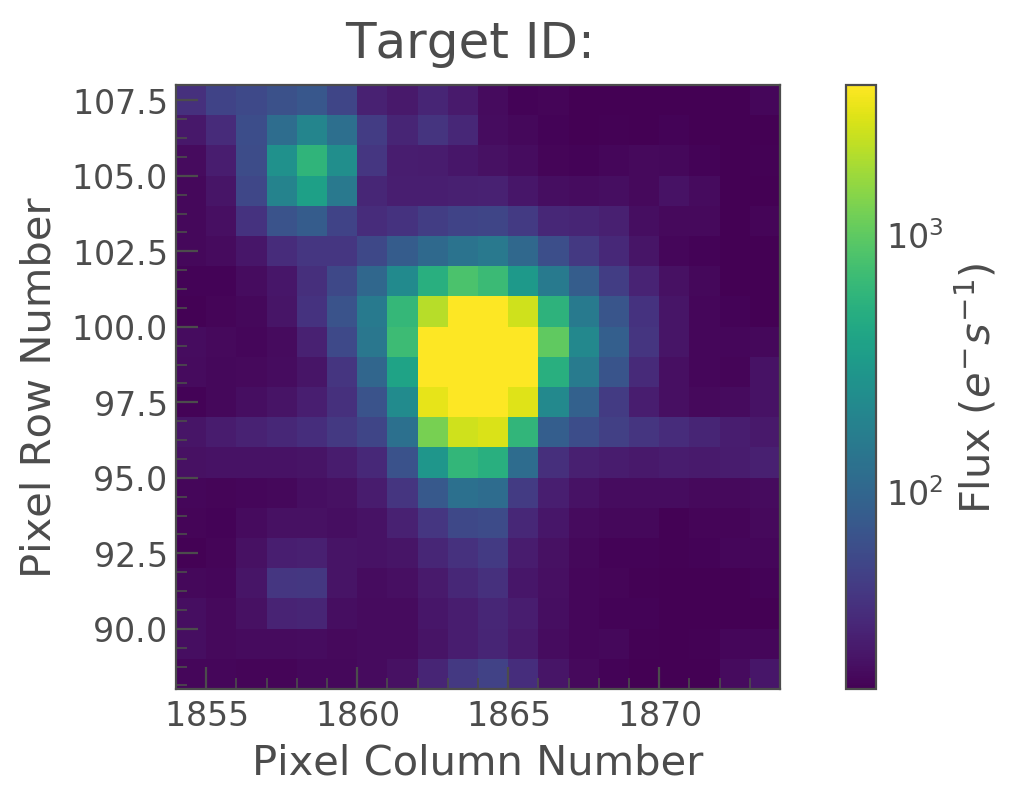

In [30]:
tpf.plot(scale='log')

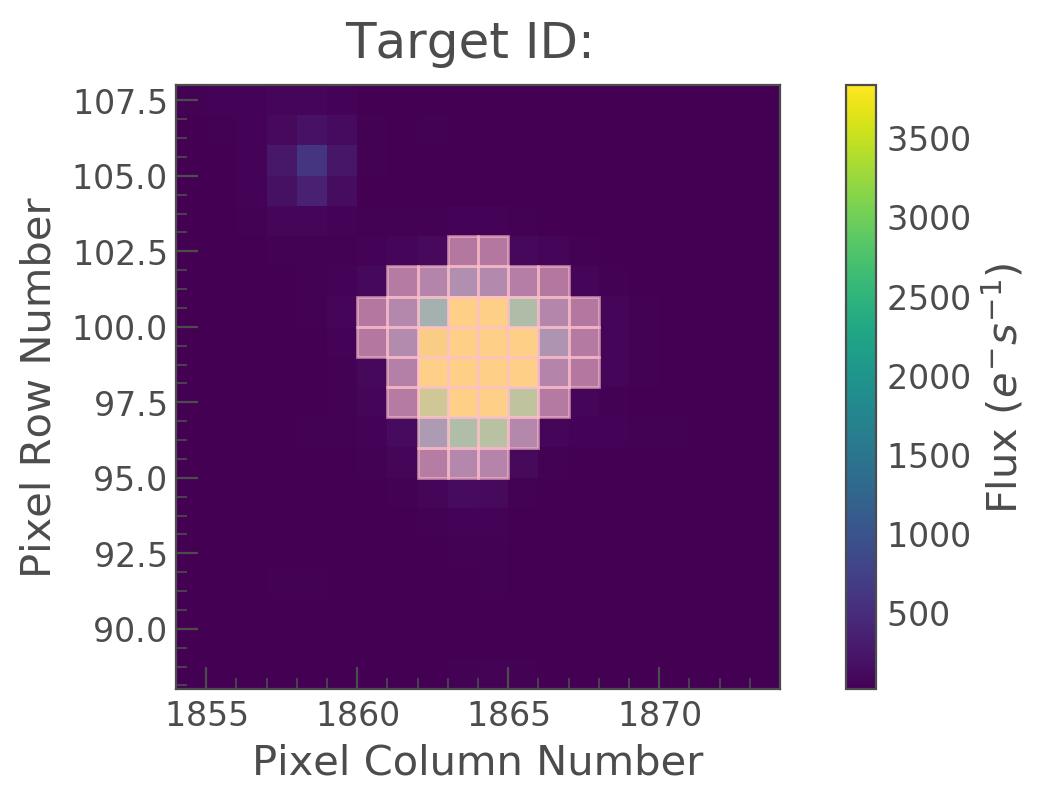

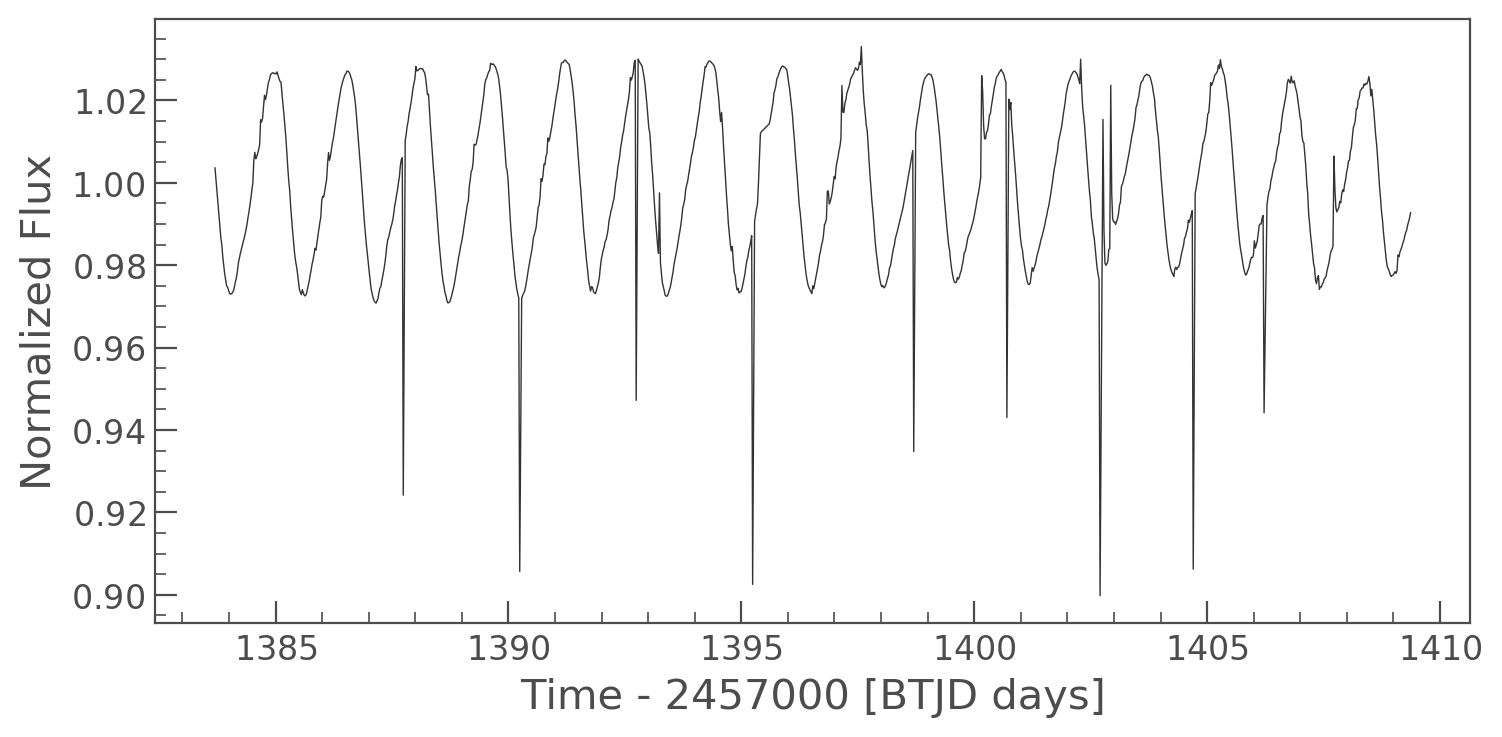

In [49]:
# Take a look!
aper = tpf.create_threshold_mask(15)
tpf.plot(aperture_mask=aper)
lc = tpf.to_lightcurve(aperture_mask=aper).normalize()
lc.plot()

In [37]:
hdu = fits.open('hack-custom-lc.fits')

In [69]:
red_lc = lk.LightCurve(hdu[1].data['TIME'], hdu[1].data['FLUX'], hdu[1].data['FLUX_ERR']).normalize()


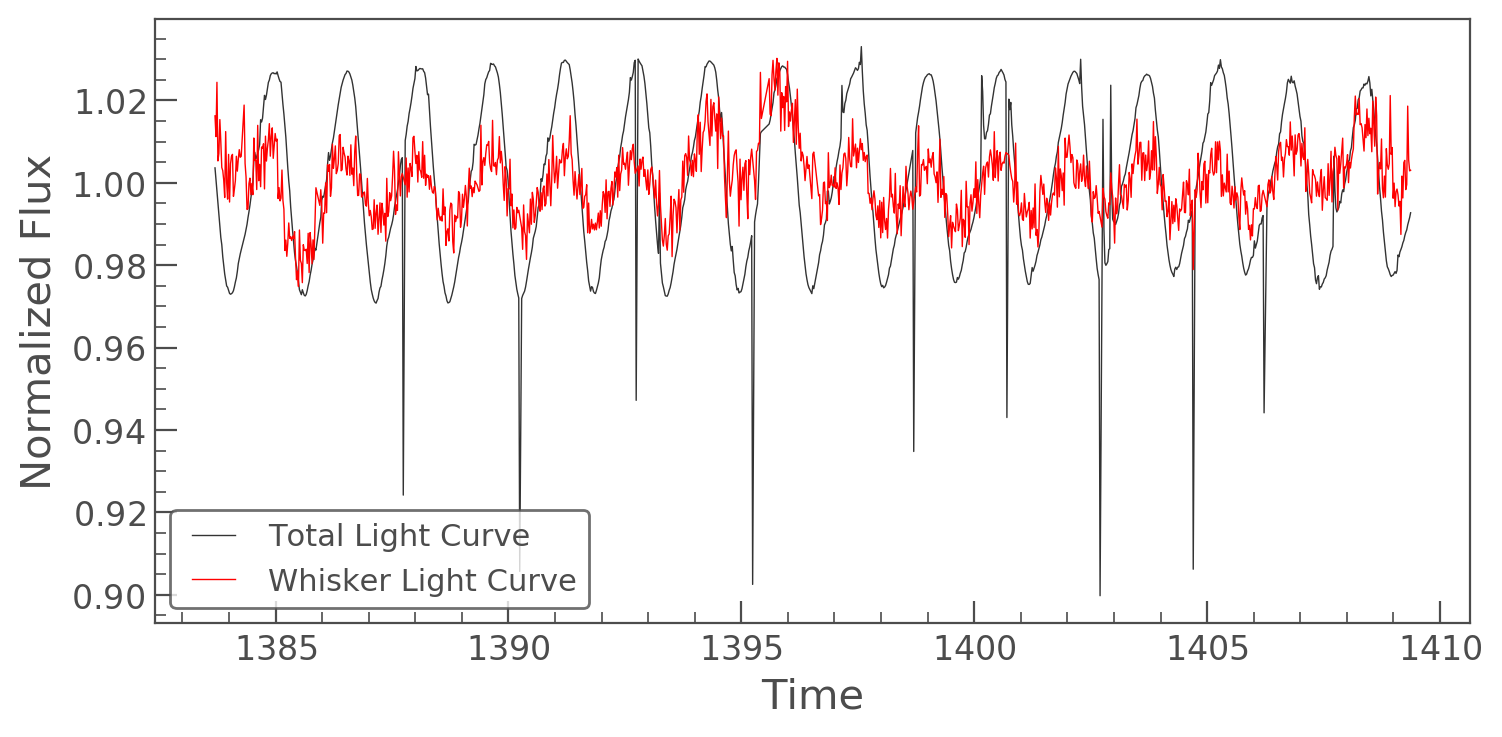

In [70]:
ax = lc.plot(label='Total Light Curve')
red_lc.remove_outliers().plot(ax=ax, c='r', label='Whisker Light Curve')

In [71]:
p = lc.to_periodogram(min_period=1, max_period=5, oversample_factor=100)

In [72]:
period = p.period_at_max_power.value

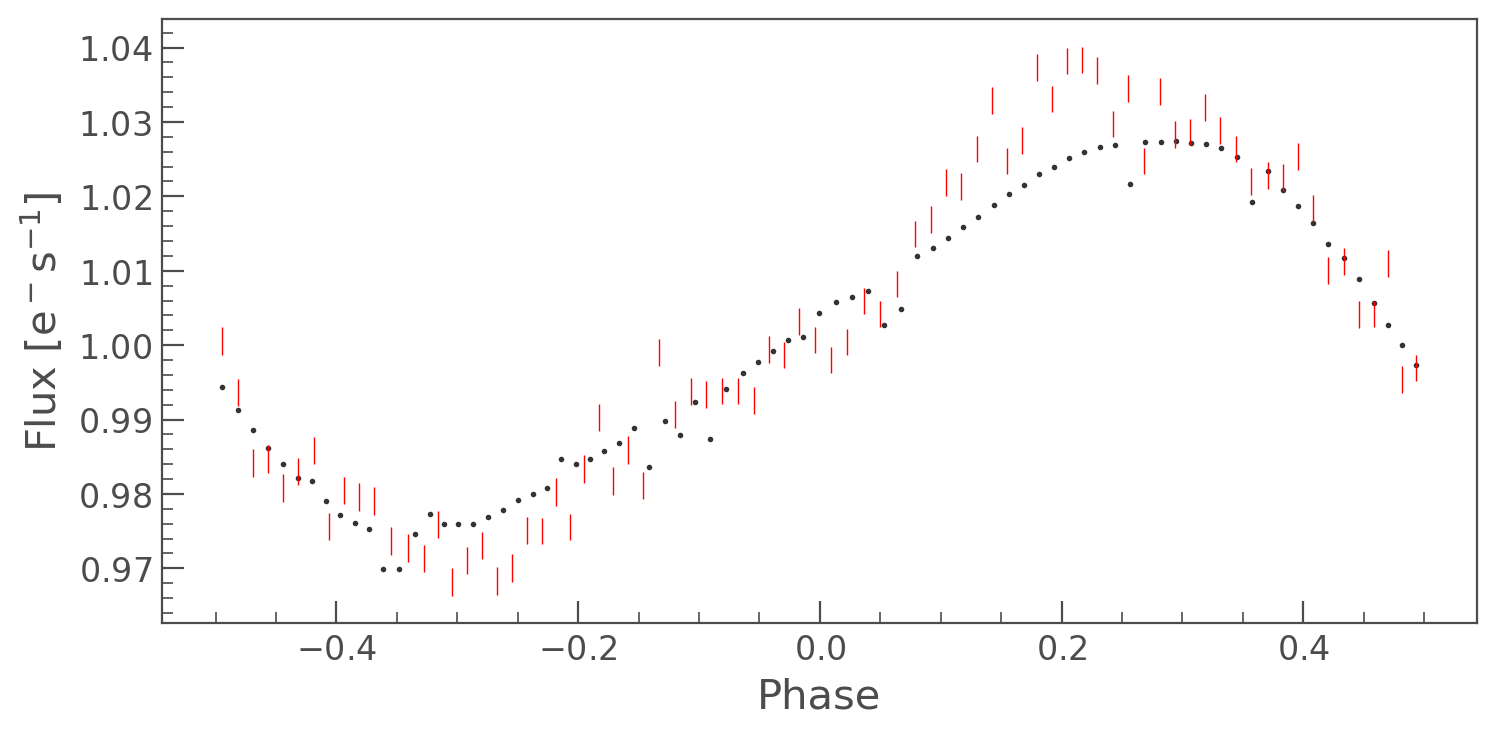

In [76]:
ax = lc.fold(period).bin(15).scatter(normalize=False)
(red_lc * 4 - 4 + 1).remove_outliers().fold(period).bin(15).errorbar(ax=ax, c='r', normalize=False)